<a href="https://colab.research.google.com/github/Vernalhav/numeric_methods/blob/master/numerico_aplicacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Victor Giovannoni Vernalha 10786159  
Victor Graciano de Souza Correia 10431201

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# **Tema 1: Interpolação polinomial**

## Revisão teórica

O objetivo da interpolação polinomial é dado $n+1$ pontos $P_0, P_1, \dots P_n$, encontrar uma função polinomial $P(x)$ de grau $n$ que passe por todos os pontos dados.  
  
Optamos chegar nesse resultado através do polinômio no formato de Lagrange, já que a explicação é mais intuitiva e a implementação mais simples.  
  
Queremos encontrar um polinômio da forma $$P(x) = \sum_{k=0}^{n} y_kl_k(x)$$
Onde $l_k(x)$ é um polinômio que só depende da coordenada $x$ dos pontos dados e $y_k$ é a k-ésima coordenada $y$ dos pontos dados.  

Se o k-ésimo ponto tem coordenadas $(x_k, y_k)$, sabemos que $P(x_k) = y_k$, já que queremos que o polinômio passe por todos os pontos dados.  
Observe que uma maneira dessa condição ser atendida é para que todos os polinômios $\ l_i(x_k) = 0$ quando $i \neq k\ $ e $\ l_k(x_k) = 1$, já que o somatório iria resultar em exatamente $y_k$.  
Mas se $\ i \neq k \implies l_k(x_i) = 0$, então o conjunto $\{ x_0, \dots, x_{k-1}, x_{k+1}, \dots, x_n \}$ correspondem às raízes de $l_k(x)$.  
  
Podemos então escrever

$$\quad l_k(x) = \alpha\prod_{\substack{i=0\\i \neq k}}^{n}(x - x_i) \tag{$\star$}$$

Observe que, de fato, o conjunto de raízes que definimos acima é satisfeito para esse polinômio. O fator $\alpha$ é necessário para representar todos os polinômios que possuem essas raízes. Para encontrar $\alpha$, basta utilizar o fato de que $l_k(x_k)=1$. Avaliando $l_k(x_k)$, temos:

$$1 = \alpha \prod_{\substack{i=0\\i \neq k}}^{n}(x_k-x_i),$$

logo

$$\alpha = \prod_{\substack{i=0 \\ i \neq k}}^{n}(x_k - x_i)^{-1}$$
  
Portanto, substituindo $\alpha$ em $(\star)$, o nosso polinômio $l_k(x)$ é

$$l_k(x) = \prod_{\substack{i=0 \\ i \neq k}}^{n}\frac{(x - x_i)}{(x_k - x_i)}$$

  
Uma vez que definimos todos os $l_k(x)$, podemos construir $P(x)$.

## Implementação

In [0]:
def k_lagrange_polynomial(k, X):
    """
    Return the k-th lagrange polynomial as a function.
    It receives x as input and returns L_k(x)
    """
    x_k = X[k]
    X_new = np.delete(X, k)

    def k_polynomial(x):
        return np.prod((x - X_new)/(x_k - X_new))
    
    return k_polynomial

In [0]:
def lagrange_polynomial(X, Y, return_Ls=False):
    """
    Returns the polynomial that fits the given points X/Y
    as a function.
    The returned function receives x as input and returns
    P(x).

    If retuen_Ls is True, then this function returns a tuple
    with the first element being P(x) and the second is an
    array with all the L_k polynomials used to compute P(x).
    """

    X = np.array(X)
    Y = np.array(Y)
    n = X.shape[0]
    
    L = [ k_lagrange_polynomial(k, X) for k in range(n) ]

    def polynomial(x):
        L_x = np.array([ L[k](x) for k in range(n) ])
        return np.dot(Y, L_x)

    if return_Ls: return polynomial, L
    
    return polynomial

## Aplicação: aproximação de funções por _sampling_

In [0]:
def approximate(points, x_0, show_Ls=True, show_axis=False):
    """
    Approximate a value x_0 given a set of points by
    fitting a polynomial through them. 
    
    Returns P(x_0), where P(x) is the lagrange polynomial
    that fit the given points and displays the computed
    polynomial, along with the points given.

    If show_Ls is false, do not display the L polynomials
    that were used to compute P(x). If it is true, display
    y_k*l_k(x)

    If show_axis is true, display the x axis.
    """

    X = [points[i][0] for i in range(len(points))]
    Y = [points[i][1] for i in range(len(points))]

    P, L = lagrange_polynomial(X, Y, return_Ls=True)
    
    min_x = min(X)
    max_x = max(X)

    avg_x_dist = (min_x + max_x + 1)/(2*len(X))

    # x coordinates to evaluate P(x) in
    x = np.linspace(min(x_0, min_x) - avg_x_dist, max(x_0, max(X)) + avg_x_dist, 10*len(X))

    plt.plot(x, [P(x_i) for x_i in x])  # Plot P(x)
    plt.scatter(X, Y, marker='o')       # Mark given points

    plt.scatter(x_0, P(x_0), marker='o', color='red')   # Mark x_0/P(x_0)

    if show_axis: plt.plot([x[0], x[-1]], [0, 0], color='black') # Plot x axis

    if not show_Ls:
        plt.show()
        return P(x_0)

    for i in range(len(L)):
        # Plot y_i*L_k(x)
        plt.plot(x, [Y[i]*L[i](x_i) for x_i in x], linestyle='--', alpha=0.7)

    plt.show()
    return P(x_0)

Algo interessante de se visualizar é que o polinômio $y_kl_k(x)$ gerado por cada $x_k$ se intersecta com a curva final no ponto $(x_k, y_k)$ por conta da restrição que impusemos:  $l_k(x_k) = 1$. Além disso, o polinômio é 0 para os outros pontos fornecidos por conta da outra restrição que impusemos com relação às suas raízes.

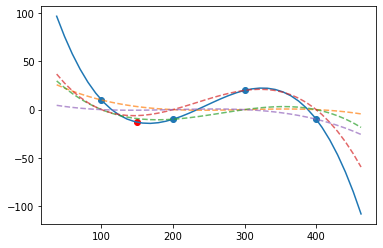

An approximation for f(150) is -13.12


In [5]:
points = [(100, 10), (200, -10), (300, 20), (400, -10)]
x_0 = 150

approx = approximate(points, x_0)
print('An approximation for f({}) is {:.2f}'.format(x_0, approx))

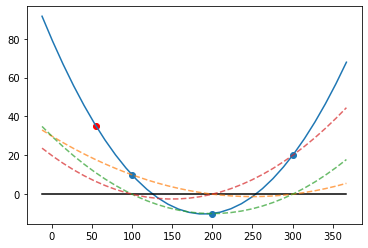

An approximation for f(55) is 35.31


In [6]:
x_0 = 55
points = [(100, 10), (200, -10), (300, 20)]

approx = approximate(points, x_0, show_axis=True)
print('An approximation for f({}) is {:.2f}'.format(x_0, approx))

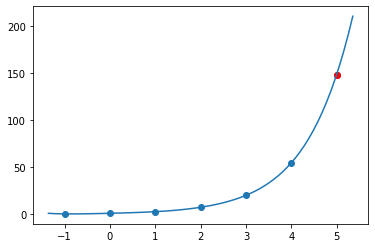

An approximation for f(5) is 148.41


In [7]:
points = [(x, np.exp(x)) for x in range(-1, 6)]
x_0 = 5

approx = approximate(points, x_0, show_axis=False, show_Ls=False)
print('An approximation for f({}) is {:.2f}'.format(x_0, approx))